In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [2]:
print("✅ 데이터 샘플")
print(df.head(), "\n")

✅ 데이터 샘플
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   



In [3]:
print("✅ 결측치 여부")
print(df.isnull().sum(), "\n")

✅ 결측치 여부
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 



In [4]:
print("✅ 통계 요약")
print(df.describe(), "\n")

✅ 통계 요약
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000   



C:\Users\admin\AppData\Local\Temp\ipykernel_16500\3121617433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='pastel')


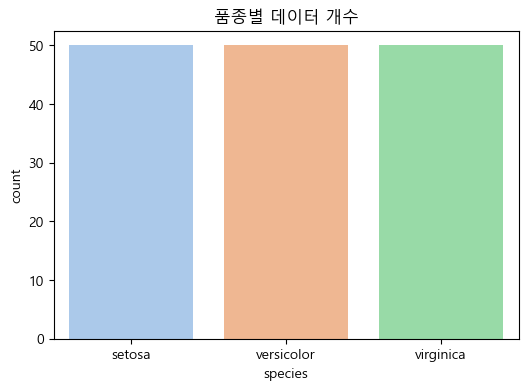

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='species', palette='pastel')
plt.title("품종별 데이터 개수")
plt.show()

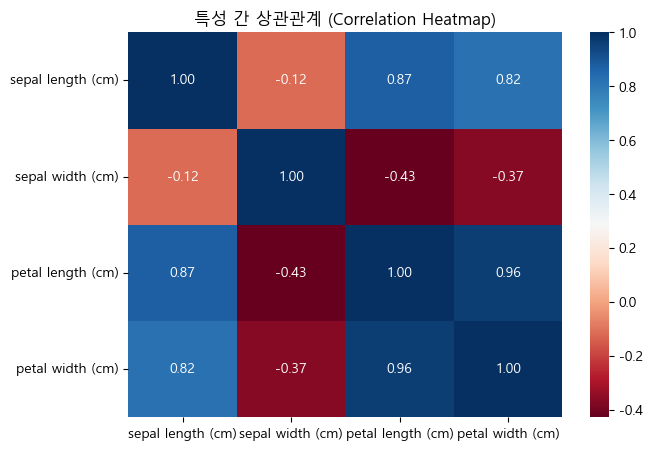

In [17]:
plt.figure(figsize=(7,5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title("특성 간 상관관계 (Correlation Heatmap)")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16500\2145295073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2')
C:\Users\admin\AppData\Local\Temp\ipykernel_16500\2145295073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2')
C:\Users\admin\AppData\Local\Temp\ipykernel_16500\2145295073.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, palette='Set2')
C:\Users\admin\AppData\Local\Temp\ipykernel_16500\2145295073.

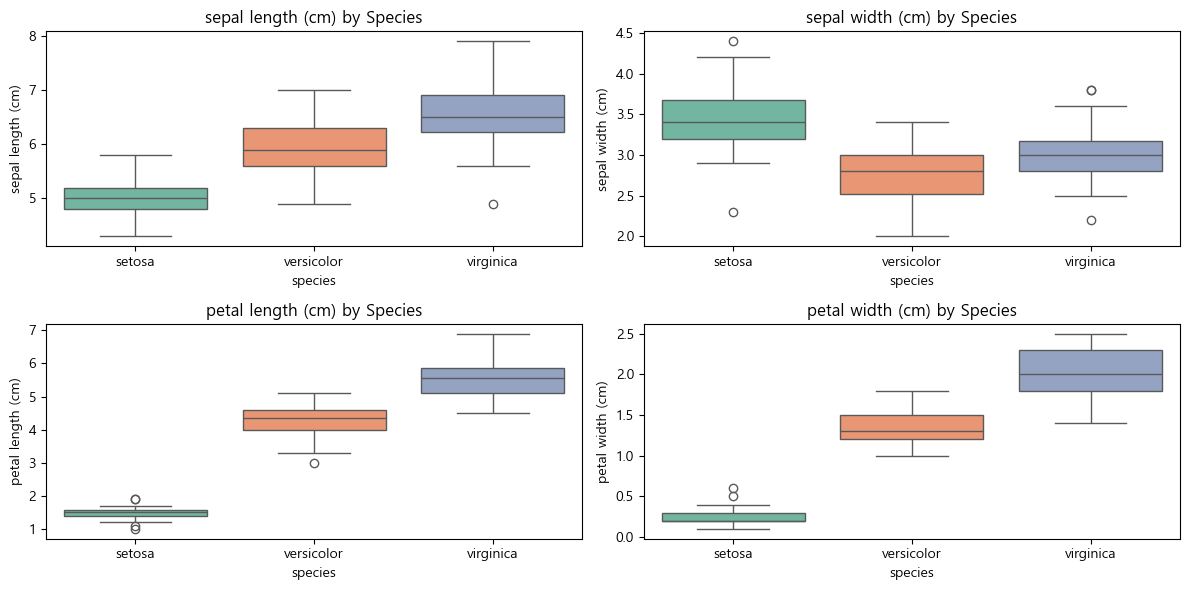

In [7]:
features = df.columns[:-1]
plt.figure(figsize=(12,6))
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x='species', y=feature, palette='Set2')
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

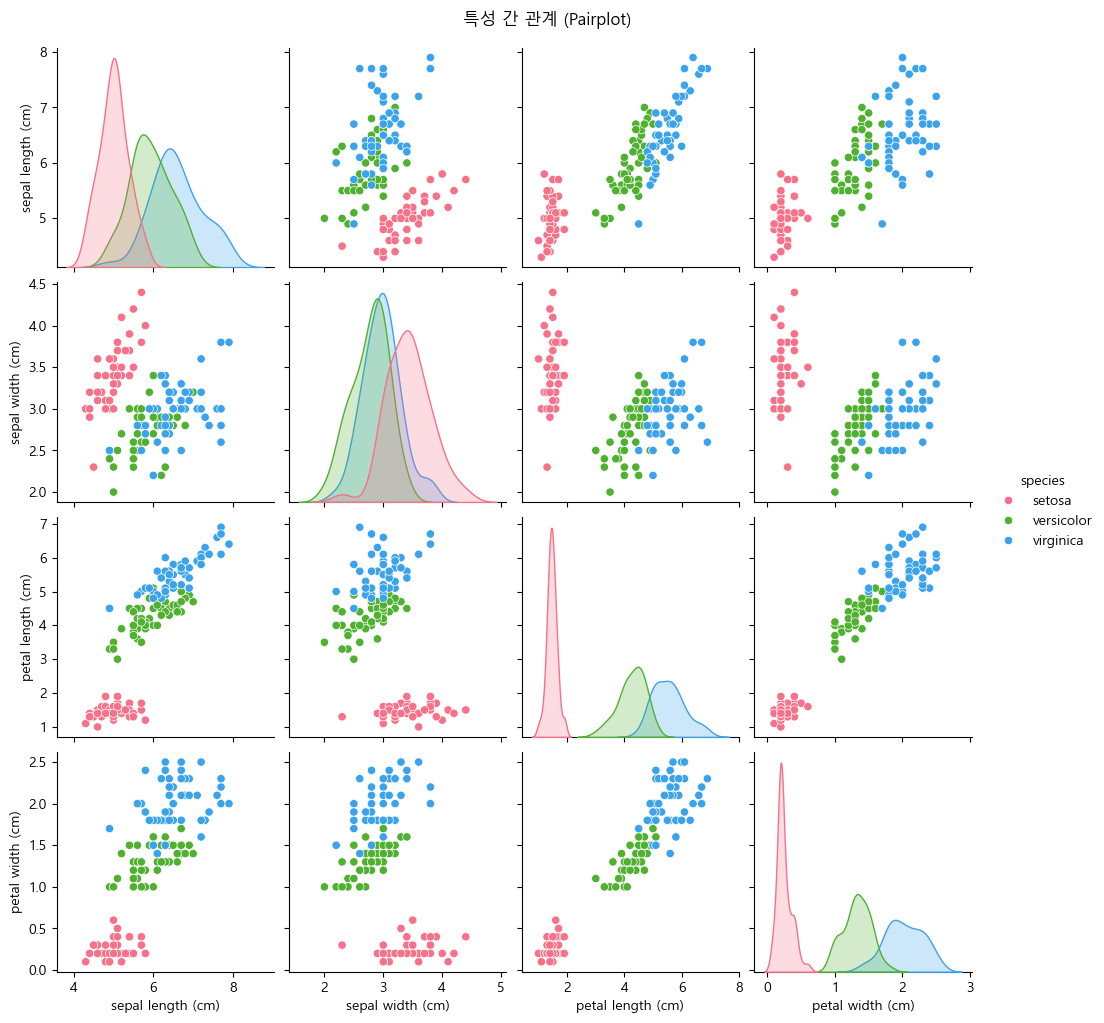

In [8]:
sns.pairplot(df, hue='species', palette='husl', diag_kind='kde')
plt.suptitle("특성 간 관계 (Pairplot)", y=1.02)
plt.show()


In [9]:
print("📊 인사이트 요약")
print("""
1. setosa는 다른 두 종에 비해 꽃잎 길이/폭이 매우 짧음.
2. versicolor와 virginica는 겹치는 구간이 있으나, 꽃잎 길이/폭으로 어느 정도 구분 가능.
3. 꽃받침(sepal)보다 꽃잎(petal) 특성이 품종 구분에 더 유용함.
""")

📊 인사이트 요약

1. setosa는 다른 두 종에 비해 꽃잎 길이/폭이 매우 짧음.
2. versicolor와 virginica는 겹치는 구간이 있으나, 꽃잎 길이/폭으로 어느 정도 구분 가능.
3. 꽃받침(sepal)보다 꽃잎(petal) 특성이 품종 구분에 더 유용함.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [11]:
X = df.iloc[:, :-1]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("✅ 모델 정확도: {:.2f}%".format(acc * 100))
print("\n📋 분류 리포트:")
print(classification_report(y_test, y_pred))


✅ 모델 정확도: 90.00%

📋 분류 리포트:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



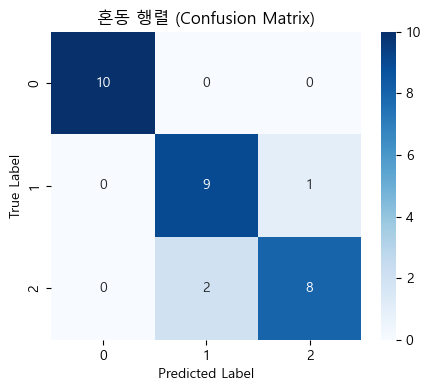

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("혼동 행렬 (Confusion Matrix)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()